# Segment 4

## Bi-functional: Algos that go Both Ways (Regression and Classification) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, mean_squared_error 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelBinarizer

### Read In Data

In [2]:
# define column names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# loading training data
iris = pd.read_csv('iris.data', header=None, names=names)

### Regression Data Set

In [3]:
# create design matrix X and target vector y
enc = LabelBinarizer().fit_transform(iris['species']) # one hot encode categorical species feature
X_reg = np.concatenate([iris[['sepal_length', "sepal_width", "petal_width"]],enc], axis=1) # end index is exclusive
y_reg = np.array(iris['petal_length']) # column name is another way of indexing df

# split into train and test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.33, random_state=42)

print("Regression X_train:") 
print(X_train_reg[1:5,])
print("\nRegression y_train:") 
print(y_train_reg[1:5])

Regression X_train:
[[7.6 3.  2.1 0.  0.  1. ]
 [5.6 3.  1.5 0.  1.  0. ]
 [5.1 3.5 0.2 1.  0.  0. ]
 [7.7 2.8 2.  0.  0.  1. ]]

Regression y_train:
[6.6 4.5 1.4 6.7]


### Classification Data Set

In [4]:
# create design matrix X and target vector y
X_cls = np.array(iris.iloc[:, 0:4]) # end index is exclusive
y_cls = np.array(iris['species']) # column name is another way of indexing df

# split into train and test
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.33, random_state=42)

print("Classification X_train:") 
print(X_train_cls[1:5,])
print("\nClassification y_train:") 
print(y_train_cls[1:5])

Classification X_train:
[[7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]]

Classification y_train:
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica']


### SVM

In [5]:
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

#### Regression
Train Model

In [30]:
svregressor=SVR(gamma='scale')
svregressor.fit(X_train_reg, y_train_reg)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Test Model

In [31]:
y_pred = svregressor.predict(X_test_reg)
print(mean_squared_error(y_test_reg, y_pred))

0.08212621040700299


#### Classification
Train Model

In [8]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_cls, y_train_cls)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Test Model

In [9]:
y_pred = svclassifier.predict(X_test_cls)
accuracy_score(y_test_cls,y_pred)

1.0

In [10]:
#other ways to assess model perfomance
print(confusion_matrix(y_test_cls,y_pred))
print(classification_report(y_test_cls,y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



### Decision Tree

In [11]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.tree import DecisionTreeClassifier

#### Regression
Train Model

In [12]:
dtRegressor = DecisionTreeRegressor(random_state = 0)  
dtRegressor.fit(X_train_reg, y_train_reg) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

Test Model

In [13]:
y_pred = dtRegressor.predict(X_test_reg)
print(mean_squared_error(y_test_reg, y_pred))

0.1242


#### Classification

Train Model

In [14]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_cls,y_train_cls)

Test Model

In [15]:
#Predict the response for test dataset
y_pred = clf.predict(X_test_cls)
print("Accuracy:", accuracy_score(y_test_cls, y_pred))

Accuracy: 1.0


### Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

#### Regression

Train Model

In [29]:
rfRegressor = RandomForestRegressor(n_estimators=10, random_state = 0)  
rfRegressor.fit(X_train_reg, y_train_reg) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

Test Model

In [18]:
y_pred = rfRegressor.predict(X_test_reg)
print(mean_squared_error(y_test_reg, y_pred))

0.07011999999999997


#### Classification

Train Model

In [28]:
rfClassifier = RandomForestClassifier(n_estimators=10, random_state = 0)  
rfClassifier.fit(X_train_cls, y_train_cls) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Test Model

In [20]:
y_pred = clf.predict(X_test_cls)
print("Accuracy:", accuracy_score(y_test_cls, y_pred))

Accuracy: 1.0


### K Nearest Neighbor

In [21]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

#### Regression

#### How to find K?

K is a hyperparameter that can be found by tuning. For example, trying many different values for K from 1 to 30 and seeing which has the lowest error.

##### Hyperameter Tuning

The optimal number of neighbors is 5


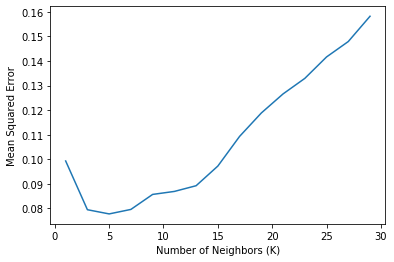

In [22]:
# creating list of Ks 
myList = list(range(1,30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_reg, y_train_reg, cv=10, scoring='neg_mean_squared_error') 
    cv_scores.append(scores.mean())

# changing from accuracy to misclassification error
mse = [ -x for x in cv_scores]

# determining best K
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs K
plt.plot(neighbors, mse);
plt.xlabel('Number of Neighbors (K)');
plt.ylabel('Mean Squared Error');

#### Train Model 

In [23]:
#instantiate learning model (K = 5)
knn_regressor=KNeighborsRegressor(n_neighbors=5)

# fitting the model
knn_regressor.fit(X_train_reg, y_train_reg) ;

#### Test Model

In [24]:
# predict the response
pred_regressor = knn_regressor.predict(X_test_reg)

# evaluate error
print(mean_squared_error(y_test_reg, pred_regressor))

0.06272799999999996


#### Classification

##### Hyperparameter Tuning

The optimal number of neighbors is 7


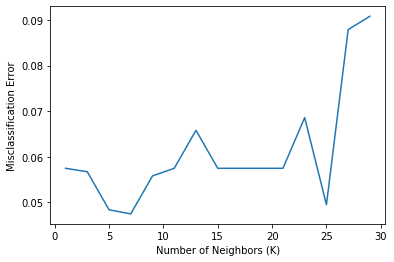

In [25]:
# creating list of Ks 
myList = list(range(1,30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_cls, y_train_cls, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing from accuracy to misclassification error
error = [1 - x for x in cv_scores]

# determining best K
optimal_k = neighbors[error.index(min(error))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs K
plt.plot(neighbors, error);
plt.xlabel('Number of Neighbors (K)');
plt.ylabel('Misclassification Error');

#### Train Model 

In [26]:
#instantiate learning model (K = 7)
knn_classifier = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn_classifier.fit(X_train_cls, y_train_cls) ;

#### Test Model

In [27]:
# predict the response
pred_classifier = knn_classifier.predict(X_test_cls)

# evaluate accuracy
print("accuracy: " + str(accuracy_score(y_test_cls, pred_classifier)))

accuracy: 0.98
